In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [8]:
df_XyzAuto = pd.read_csv(r"C:\Users\Vezik\Desktop\Projects\Coursera\automobile.csv")
df_XyzAuto 

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


In [9]:
df_XyzAuto.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

In [12]:
import datetime as dt

df_XyzAuto['Year'] = pd.to_datetime(df_XyzAuto['Date']).dt.year
df_XyzAuto['Month'] = pd.to_datetime(df_XyzAuto['Date']).dt.month

# Part 1: Create visualizations using Matplotib, Seaborn & Folium

### 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year.

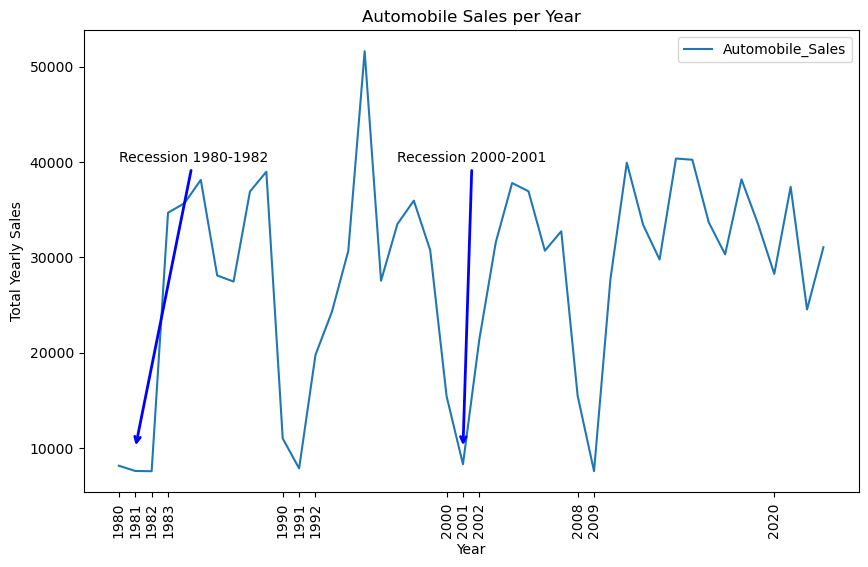

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xticks(df_XyzAuto[df_XyzAuto["Recession"] == 1]["Year"].unique())

df_XyzAuto[["Year", "Automobile_Sales"]].groupby("Year").sum().reset_index().plot(
    kind="line",
    x="Year",
    y="Automobile_Sales",
    title="Automobile Sales per Year",
    ylabel="Total Yearly Sales",
    ax=ax,
    rot=90,
)
ax.annotate("Recession 1980-1982", xy=(1981, 10000), xytext=(1980, 40000), xycoords="data",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="blue", lw=2),)

ax.annotate("Recession 2000-2001", xy=(2001, 10000), xytext=(1997, 40000), xycoords="data", arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="blue", lw=2), )
plt.show()

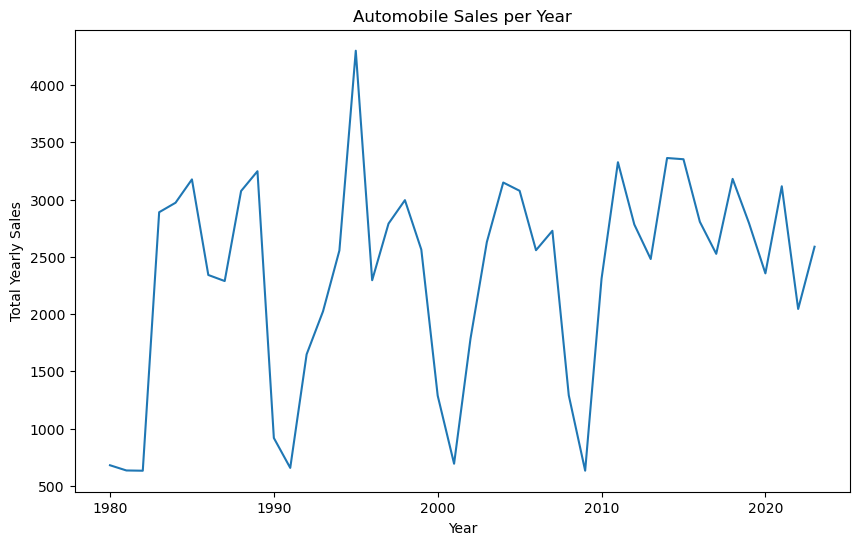

In [24]:
    #create data for plotting
    df_line = df_XyzAuto.groupby(df_XyzAuto['Year'])['Automobile_Sales'].mean()
    #create figure
    plt.figure(figsize=(10, 6))
    df_line.plot(kind = 'line')
    plt.xlabel('Year')
    plt.ylabel('Total Yearly Sales')
    plt.title('Automobile Sales per Year')
    plt.show()

### 1.2: Plot different lines for categories of vehicle type and analyse the trend. Is there a noticeable difference in sales trends between different vehicle types during recession periods?

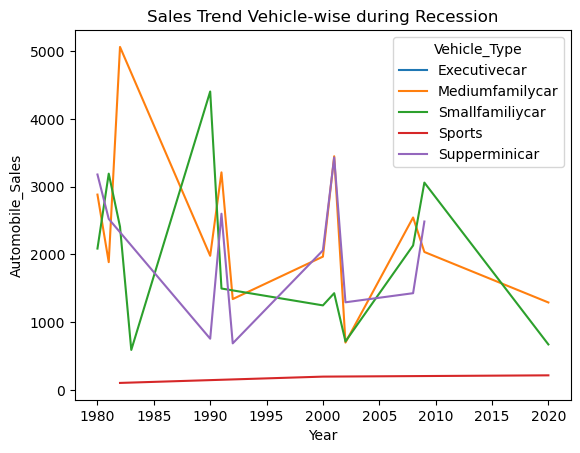

In [34]:
df_Categories = (df_XyzAuto[df_XyzAuto["Recession"] == 1][["Year", "Vehicle_Type", "Automobile_Sales"]].groupby(["Vehicle_Type", "Year"]).sum().reset_index())

sns.lineplot(data=df_Categories, x="Year", y="Automobile_Sales", hue="Vehicle_Type")
plt.title('Sales Trend Vehicle-wise during Recession')
plt.show()

### To answer the question “Is there a noticeable difference in sales trends between different vehicle types during recession periods?”
From this plot we can see there are no sales or data for Executive Car Vehicle Type and sales for Supermini Car Vehicle Type stop or data after the year 2010. During recession we can notice that Sports Vehicle Type barely has any sales while Medium Family Car and Small Family Car Type shows and increase.

### 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

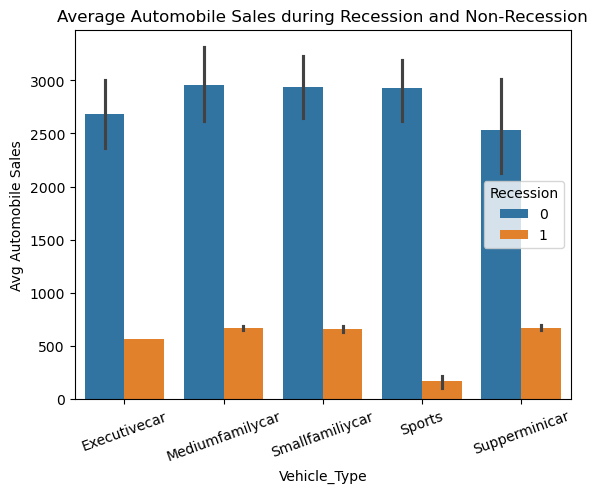

In [35]:
df_Compare = df_XyzAuto.groupby(['Recession', "Year", "Vehicle_Type"])['Automobile_Sales'].mean().reset_index()

sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession',  data=df_Compare)
plt.xticks(rotation=20)
plt.ylabel('Avg Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.show()

### 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

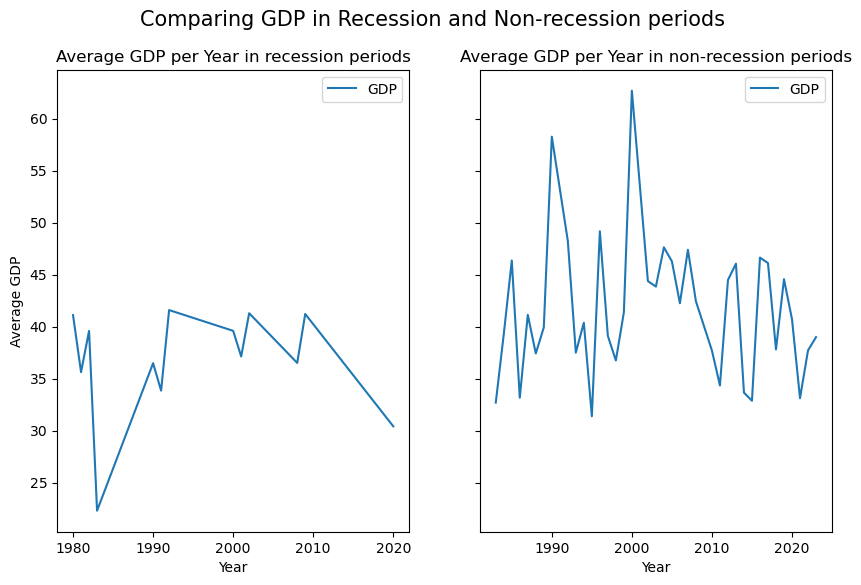

In [55]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

df_rec = df_XyzAuto[df_XyzAuto["Recession"] == 1]
df_non_rec = df_XyzAuto[df_XyzAuto["Recession"] == 0]

df_rec[["GDP", "Year"]].groupby("Year").mean().reset_index().plot(kind="line", x="Year", y="GDP", ax=axs[0], ylabel="Average GDP", title="Average GDP per Year in recession periods",)

df_non_rec[["GDP", "Year"]].groupby("Year").mean().reset_index().plot(kind="line", x="Year", y="GDP", ax=axs[1], title="Average GDP per Year in non-recession periods",)

fig.suptitle("Comparing GDP in Recession and Non-recession periods", fontsize=15)
plt.show()

### 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales. 

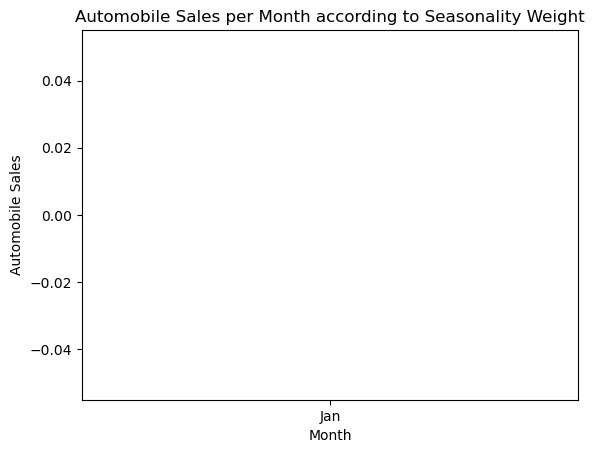

In [103]:
month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec",]

df_season = df_non_rec[["Seasonality_Weight", "Automobile_Sales", "Month"]].groupby("Month").mean().reindex(month_order, axis=0).reset_index()
sns.scatterplot(data=df_season, x="Month", y="Automobile_Sales", size="Seasonality_Weight")
plt.xlabel("Month")
plt.ylabel("Automobile Sales")
plt.title("Automobile Sales per Month according to Seasonality Weight")
plt.show()

### 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

<Figure size 1000x600 with 0 Axes>

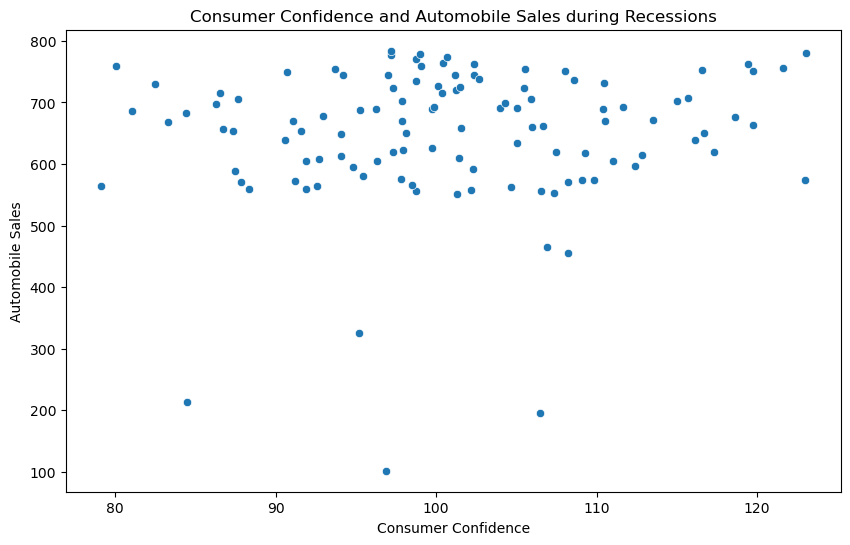

In [93]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_XyzAuto[df_XyzAuto["Recession"]==1], x='Consumer_Confidence', y='Automobile_Sales')
plt.title("Consumer Confidence and Automobile Sales during Recessions")
plt.xlabel("Consumer Confidence")
plt.ylabel("Automobile Sales")
plt.show()

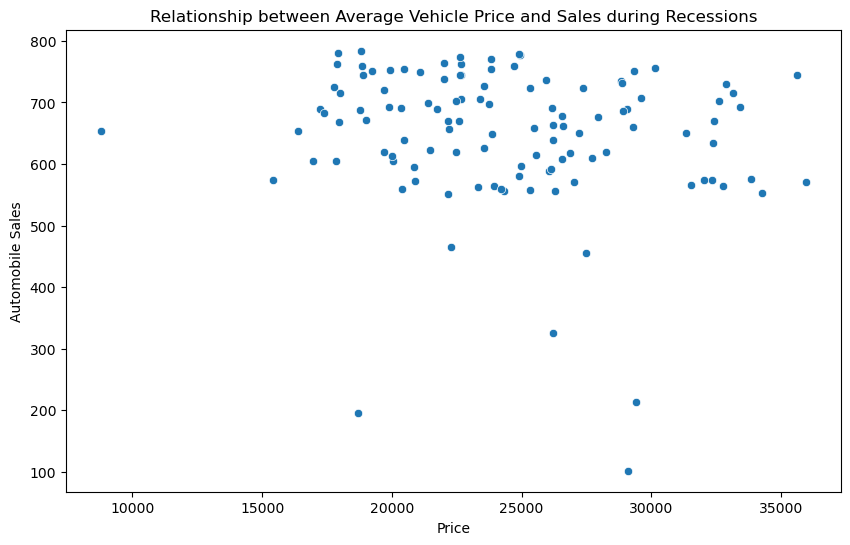

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df_XyzAuto[df_XyzAuto["Recession"]==1], x='Price', y='Automobile_Sales')
plt.title("Relationship between Average Vehicle Price and Sales during Recessions")
plt.xlabel("Price")
plt.ylabel("Automobile Sales")
plt.show()

### 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

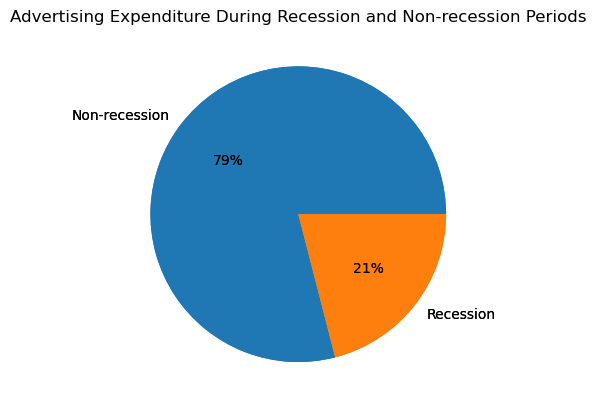

In [97]:
pie_df = df_XyzAuto[["Advertising_Expenditure", "Recession"]].groupby("Recession").sum()
pie_df["Advertising_Expenditure"].plot(
    kind="pie",
    labels=["Non-recession", "Recession"],
    autopct="%.0f%%",
    ylabel="",
    title="Advertising Expenditure During Recession and Non-recession Periods",
)
plt.show()

### 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period

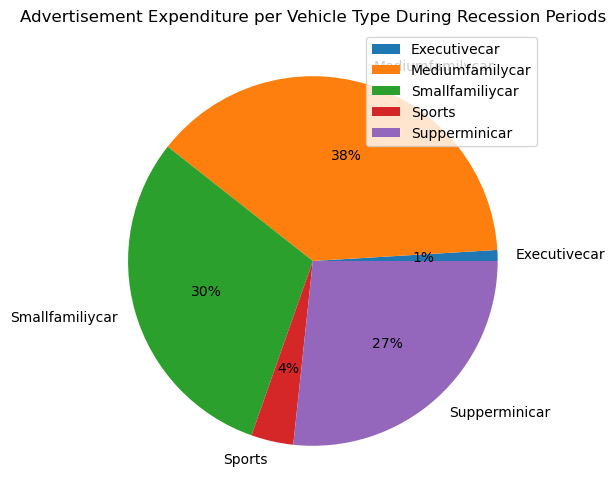

In [99]:
df_rec = df_XyzAuto[df_XyzAuto["Recession"] == 1]

type_pie = (df_rec[["Vehicle_Type", "Advertising_Expenditure"]].groupby("Vehicle_Type").sum())

type_pie.plot(
    kind="pie",
    y="Advertising_Expenditure",
    ylabel="",
    figsize=(10, 6),
    autopct="%.0f%%",
    title="Advertisement Expenditure per Vehicle Type During Recession Periods",
).legend(loc="upper right")
plt.show()

### 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period

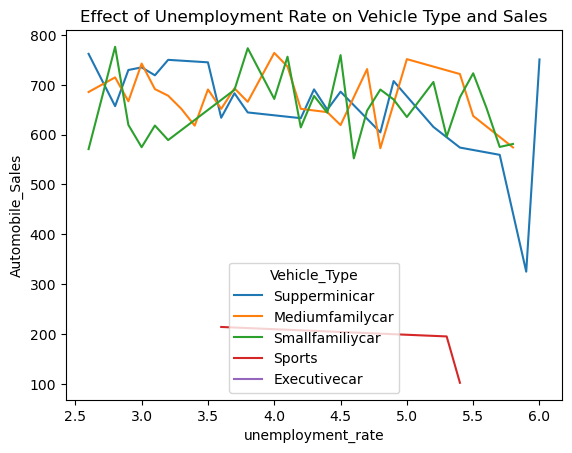

In [100]:
df_recession = df_XyzAuto[df_XyzAuto["Recession"] == 1]

sns.lineplot(
    df_recession,
    x="unemployment_rate",
    y="Automobile_Sales",
    hue="Vehicle_Type",
    err_style=None,
).set_title("Effect of Unemployment Rate on Vehicle Type and Sales")
plt.show()